# GYM environment

In [ ]:
import gym
import numpy as np 
import matplotlib.pyplot as plt


### Q1 *Value iteration*

In [ ]:
def value_iteration(gamma,transition_fun, max_iterations=100000, lmbda=0.9):
  # v
  value_function = np.zeros(len(transition_fun)) 
  num_of_states=len(transition_fun)
  num_of_actions=len(transition_fun[0])
  pi=np.zeros(num_of_states)
  delta = float('inf')
  theta=1e-10
  itr=0


  while (delta >= theta and itr < max_iterations):
    itr+=1 
    #print(itr)
    delta=0
    for s in range(num_of_states):
      prev_v=value_function[s]
      for a in transition_fun[s]: # transition_fun[s] gives all actions
        new_v=0
        for p,s1,r1,x1 in transition_fun[s][a]: 
          new_v+=p*(r1+gamma*value_function[s1])
          #max_over_A
        value_function[s]=max(value_function[s],new_v)
      delta=max(delta,abs(prev_v-value_function[s]))
    
  #pi
  for s in range (num_of_states):
    max_over_A=float('-inf')
    for a in transition_fun[s]:
      return_v=0
      for p,s1,r1,x1 in transition_fun[s][a]: 
        return_v+=p*(r1+gamma*value_function[s1])
      if(max_over_A<return_v):
        max_over_A=max(max_over_A,return_v)
        pi[s]=a
  return itr,value_function,pi


In [ ]:
def plot_fun_frozen_lake(gammas,num_of_itr,y_as_value_function,name):
  plt.subplot(1, 3, 1)
  plt.plot(gammas,num_of_itr)
  plt.title(name)
  plt.xlabel("Gamma")
  plt.ylabel("Number of iteration function converges")
  plt.subplot(1, 3, 3)
  plt.plot(gammas,y_as_value_function)
  plt.xlabel("Gamma")
  plt.ylabel("value function of the start state ( s0 )")

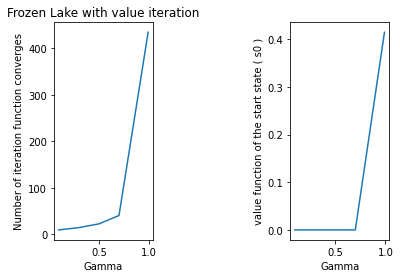

In [ ]:
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True)
gammas=[0.1,0.3,0.5,0.7,0.99]
transition_fun=env.P
num_of_itr=0
y_as_itr=[]
y_as_value_function=[]

for gamma in gammas:
  num_of_itr, value_function, pi = value_iteration(gamma,transition_fun, max_iterations=100000)
  y_as_itr.append(num_of_itr)
  y_as_value_function.append(value_function[0])

# print(pi)
plot_fun_frozen_lake(gammas,y_as_itr,y_as_value_function,"Frozen Lake with value iteration")


In [ ]:
def plot_fun_taxi(gammas,num_of_itr,y_as_value_function,name):
  plt.subplot(1, 3, 1)
  plt.plot(gammas,num_of_itr)
  plt.title(name)
  plt.xlabel("Gamma")
  plt.ylabel("Number of iteration function converges")
  plt.subplot(1, 3, 3)
  plt.plot(gammas,y_as_value_function)
  plt.xlabel("Gamma")
  plt.ylabel("max norm over the value function")

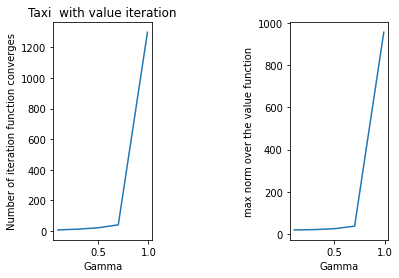

In [ ]:
env = gym.make("Taxi-v3")
gammas=[0.1,0.3,0.5,0.7,0.99]
transition_fun=env.P
num_of_itr=0
max_norm=0
y_as_itr=[]
y_as_max_norm=[]

for gamma in gammas:
  num_of_itr, value_function, pi = value_iteration(gamma,transition_fun, max_iterations=100000)
  y_as_itr.append(num_of_itr)
  for s in range (0,len(transition_fun)):
    max_norm=max(max_norm,value_function[s])
  y_as_max_norm.append(max_norm)

# print(pi)

plot_fun_taxi(gammas,y_as_itr,y_as_max_norm,"Taxi  with value iteration")

Observations: Yes, the policy obtained through value iteration can vary based on the value of gamma used. This is because gamma represents a different goal in different number of steps. A lower value of gamma will result in a policy that prioritizes short-term rewards, while a higher value of gamma will result in a policy that prioritizes long-term rewards.
A higher gamma results in higher discounted returns, which means that far sighted agent would perform better.

### Q2: *Policy iteration*

In [ ]:
def policy_iteration(gamma,value_function,transition_fun, max_iterations=100000, lmbda=0.9):
  num_of_states=len(transition_fun)
  num_of_actions=len(transition_fun[0])
  delta = float('inf')
  theta=1e-10
  itr=0
  pi=np.zeros(num_of_states)
  while (True):

    # Policy evaluation
    while (True):
      itr+=1
      # print(itr)
      delta=0
      for s in range(0,num_of_states):
        prev_v=value_function[s]
        a = pi[s]
        new_v=0
        for p,s1,r1,x1 in transition_fun[s][a]: #sum over next state and reward
            new_v+=p*(r1+gamma*value_function[s1])
        value_function[s]=new_v
        delta=max(delta,abs(prev_v-value_function[s]))
      if (delta<theta):
        break
      
    #Policy Improvement pi
    
    policy_stable=True
    for s in range (num_of_states):
      old_act=pi[s]
      max_over_A=float('-inf')
      best_a=-1
      for a in transition_fun[s]:
        return_v=0
        for p,s1,r1,x1 in transition_fun[s][a]: 
          if s1 >= len(value_function): # Check if s1 is within the bounds of value_function
            return_v += p * r1
          else:
            return_v+=p*(r1+gamma*value_function[s1])
        if(return_v>max_over_A or (return_v==max_over_A and a==best_a)):
          max_over_A=return_v
          best_a=a
      if(old_act!=best_a):
        policy_stable= False
      pi[s]=best_a
    if(policy_stable==True):
      break
  # for Printing table of V(s) value of each state for each iteration of converged policy
  # For Q2 of KBC
  print(value_function)
  return itr,value_function,pi
    


[2.87107848e-18 6.09824930e-17 1.29200199e-15 2.69998490e-14
 5.26614834e-13 7.61779497e-12 9.54734125e-11 6.08620831e-10
 2.31972899e-17 4.76706397e-16 1.04709669e-14 2.56383571e-13
 7.65403644e-12 1.25442642e-10 2.16010813e-09 1.70413833e-08
 1.97062209e-16 3.77201147e-15 5.64541666e-14 0.00000000e+00
 1.03651837e-10 1.59551708e-09 4.76364181e-08 4.92040006e-07
 1.94571816e-15 5.62301678e-14 1.67938210e-12 5.02687786e-11
 1.50638398e-09 0.00000000e+00 9.34892427e-07 1.42215238e-05
 1.96430153e-16 3.75103440e-15 5.61044377e-14 0.00000000e+00
 4.50375986e-08 9.04189927e-07 1.37776126e-05 4.11489297e-04
 7.60496429e-18 0.00000000e+00 0.00000000e+00 1.48642558e-08
 4.45431648e-07 1.33030476e-05 0.00000000e+00 1.19189681e-02
 2.45363602e-17 0.00000000e+00 1.65532818e-11 4.96026970e-10
 0.00000000e+00 3.97741806e-04 0.00000000e+00 3.45238585e-01
 7.04633755e-16 1.97306120e-14 5.71483186e-13 0.00000000e+00
 4.10998315e-04 1.19189511e-02 3.45238585e-01 0.00000000e+00]
[9.73377568e-12 6.53073

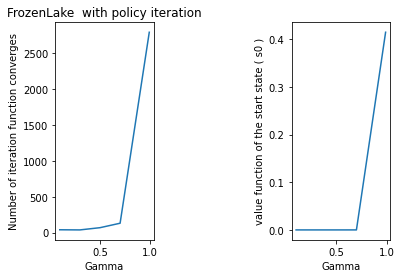

In [ ]:
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True)
transition_fun=env.P
value_function = np.zeros(len(transition_fun)) 
num_of_itr=0
y_as_itr=[]
y_as_value_function=[]
gammas=[0.1,0.3,0.5,0.7,0.99]
for gamma in gammas:
  num_of_itr, value_function, pi = policy_iteration(gamma,value_function,transition_fun, max_iterations=100000)
  y_as_itr.append(num_of_itr)
  y_as_value_function.append(value_function[0])
#print(pi)
plot_fun_frozen_lake(gammas,y_as_itr,y_as_value_function,"FrozenLake  with policy iteration")



[ 1.01010101 -1.11111109 -1.11089899 -1.1111109  -1.11111111 -1.11111109
 -1.11111111 -1.11111111 -1.11111109 -1.11111111 -1.11089899 -1.11111111
 -1.11111111 -1.11111111 -1.11111111 -1.1111109  20.1010101  -1.1111109
 -1.1089899  -1.11110899 -0.8989899  -1.11111111 -1.1110899  -1.11111109
 -1.11111111 -1.1111109  -1.11111111 -1.11111111 -1.11111111 -1.11111111
 -1.1110899  -1.11111111 -1.11111111 -1.11111111 -1.11111111 -1.11110899
  1.01010101 -1.11110899 -1.11089899 -1.1110899  -1.11110899 -1.11111111
 -1.11111111 -1.11111111 -1.11111111 -1.08989899 -1.11111111 -1.1111109
 -1.11111111 -1.11111111 -1.11110899 -1.11111111 -1.11111111 -1.11111111
 -1.11111111 -1.1110899  -1.1110899  -0.8989899  -1.1110899  -1.11089899
 -1.1111109  -1.11111111 -1.11111111 -1.11111111 -1.11111111 -0.8989899
 -1.11111111 -1.11110899 -1.11111111 -1.11111111 -1.1111109  -1.11111111
 -1.11111111 -1.11111111 -1.11111111 -1.11089899 -1.11110899  1.01010101
 -1.11110899 -1.1089899  -1.11111109 -1.11111111 -1.11

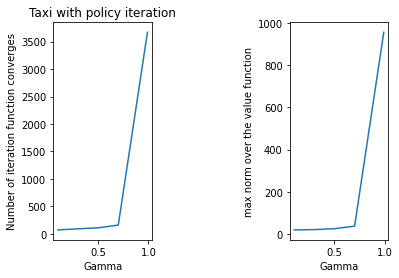

In [ ]:
env = gym.make("Taxi-v3")
transition_fun=env.P
value_function = np.zeros(len(transition_fun)) 
gammas=[0.1,0.3,0.5,0.7,0.99]
transition_fun=env.P #transition function
num_of_itr=0
max_norm=0
y_as_itr=[] #list for taking number of iterations as y axis
y_as_max_norm=[] #list for taking number of iterations as y axis

for gamma in gammas:
  num_of_itr, value_function, pi = policy_iteration(gamma,value_function,transition_fun, max_iterations=100000)
  y_as_itr.append(num_of_itr)
  for s in range (0,len(transition_fun)):
    max_norm=max(max_norm,value_function[s])
  y_as_max_norm.append(max_norm)
# print(pi)
plot_fun_taxi(gammas,y_as_itr,y_as_max_norm,"Taxi with policy iteration")

Observations: The policy of a policy iteration reaches its final state faster than the value function. one more iteration is performed to ensure that the policy is stable and has converged. Still the value function continues to be adjusted.

### Q3:
For all gammas in Value Iteration requireds less number of iterations to converge than Policy Iteration it is because value iteration combines the policy evaluation and policy improvement.


From graph we can see that in frozen lake
value iteration required : about 500 iterations

policy iteration required : about 2600 iterations

From graph we can see that in taxi
value iteration required : about 1500 iterations

policy iteration required : about 3600 iterations



### Q4:  *First-visit Monte-carlo prediction*

In [ ]:
def run_montecarlo(env, gamma, pi, delta=1e-12):
    itr = 0 # Initialize number of iterations and actions
    available_actions = list(range(env.action_space.n))
    state_count = env.observation_space.n
    state_values = [[0, 0] for i in range(state_count)]

     # Run Montecarlo algorithm for 10^5 iterations
    for _ in range(int(1e5)):
        itr += 1
        curr_s = env.reset()
        episode = []
        done = False
        max_differences = [0 for i in range(state_count)]
        s_visit_counts = [0 for i in range(state_count)]

         # Run the episode until done flag is set to True
        while not done:
            s_visit_counts[curr_s] += 1
            action = pi[curr_s]
            s1, reward, done, info = env.step(action) # Add the state, action, reward and next state information to the episode
            episode.append([curr_s, action, reward, s1]) #s1 = next state
            curr_s = s1
        r = 0

        # Loop through the episode in reverse order and store prev value function for current state
        for state, action, reward, next_state in episode[::-1]:
            prev_value = state_values[state][0]
            r = gamma*r + reward
            if s_visit_counts[state] != 1:
                s_visit_counts[state] -= 1
                continue
            state_values[state][1] += 1
            state_values[state][0] = state_values[state][0] + (r - state_values[state][0]) / state_values[state][1]
            max_differences[state] = abs(state_values[state][0] - prev_value)
    state_values = [i[0] for i in state_values]
    return itr, state_values, pi


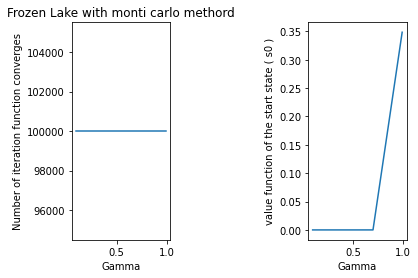

In [ ]:
#environment for monte carlo methord
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=True)
transition_fun=env.P
y_as_itr=[]
y_as_value_function=[]

gammas = [0.1,0.3,0.5,0.7,0.99]
for gamma in gammas:
   valueItr_num_of_itr , valueItr_value_function , valueItr_pi = value_iteration(gamma,transition_fun)
   num_of_itr, value_function, pi = run_montecarlo(env, gamma,valueItr_pi)

   y_as_itr.append(num_of_itr)
   y_as_value_function.append(value_function[0])

# plot
plot_fun_frozen_lake(gammas,y_as_itr,y_as_value_function,"Frozen Lake with monti carlo methord")


*Exicution time : about 8 mins*

Observation:
For larger gamma Monte Carlo method converges slowly. This is because with a larger gamma, the errors in future states have a greater impact on the computation of the value function for the current state. which means its very time and resource consuming to for estimating value function when environment is not present.

the braph between gamma and value function seem similar to value iteration which indicates monticarlo function converges


#RL Agent playing Kaun Banega Crorepati (KBC)

### Q1: Formulate the above problem as an MDP; mention all the key components

States:

0. ₹1,000
1. ₹2,000
2. ₹3,000
3. ₹5,000
4. ₹10,000
5. ₹20,000
6. ₹40,000
7. ₹80,000
8. ₹1,60,000
9. ₹3,20,000 - terminal state

Actions:

*   Continue playing
*   Quit

Probabilities : probability of winning at each level is given as : 0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1

Reward: if quit/win all recives money currospond to current level or all lost







In [ ]:
#MDP for kbc

states=[0,1,2,3,4,5,6,7,8,9] # It represent current levels starting from level 0
actions=[0,1] #0 means keep playing, 1 Quit
win_probabilities=[0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1] # represent probability of winning current level
rewards=[1000,2000,3000,5000,10000,20000,40000,80000,160000,320000]
level=0
state_action=[] # list containing [(transition probability, next state, reward, Is terminal state?)]
trans_function = {}  # Dictionary to store the transition function

win_transitions = []
lose_transitions = []
quit_transitions = []

for i in range(len(states)-1):
  win_transitions.append((win_probabilities[i], i + 1, 0, False))
win_transitions.append((0.1, 9, 320000, True))


for i in range(len(states)-1):
  lose_transitions.append((1 - win_probabilities[i], i, 0, True))
lose_transitions.append((0.9, 9, 0, True))


quit_transitions.append((1, 0, 0, True))
for i in range(1, len(states)):
  quit_transitions.append((1, i, rewards[i-1], True))

for i in range(len(states)):
  state_action = [win_transitions[i], lose_transitions[i]]
  quit_action = [quit_transitions[i]]
  trans_function[i] = {0: state_action, 1: quit_action}

In [ ]:
# env.P
# [state :[action: [(transition probability, next state, reward, Is terminal state?)]]

### Q2: Optimum policy using policy iteration

In [ ]:
#Policy iteration in KBC
num_of_itr=0
gammas=[0.99]
value_function=np.zeros(len(trans_function)) 
for gamma in gammas:
  num_of_itr, value_function, pi = policy_iteration(gamma,value_function,trans_function,max_iterations=100000)



[13202171.07119998 13336873.35740751 13486557.68240647 13656842.50162878
 13853910.93599572 14087141.75983403 14371730.48225492 14734652.96918055
 15230769.23076913 15999999.99999989]


Q3: With print in policy iteration function we are printing table of V(s) for each iteration of converged policy

# Managing a Warehouse

###Q1: MDP 

In [ ]:
import scipy.stats as stats

n=16 #number of state is 16
#number of action depends on state to state such that 
transition = {}
poisson = stats.poisson
for s in range(n): # Looping over all possible states (inventory levels)
    state_dict = {}
    for a in range(0, n - s): # Loop over all possible actions (number of orders)
        state_list = []
        for j in range(0, n): # Loop over all possible next states (inventory levels)
            u = s + a
            prob_sum = 0
            for i in range(u, u + 15): # Calculating the probabilities of next states
                prob_sum += poisson.pmf(k=i, mu=5)
            reward_sum = 0
            for j in range(0, u): # Calculating the rewards for next states
                reward_sum += (8 * (j)) * (poisson.pmf(k=j, mu=5))
            reward_sum += (8 * (u) * prob_sum)
            reward = reward_sum - (5 + 2 * (u)) - (s)
            if j > u: # Checking for terminal states
                prob = 0
            elif j <= u and j > 0:
                prob = poisson.pmf(k=u-j, mu=5)
            elif j == 0:
                prob = prob_sum
            # Appending the state information (probability, next state, reward, terminal state) to state_list
            state_list.append((prob, j, reward, False)) 
        state_dict[a] = state_list
    transition[s] = state_dict


### Q2:Value iteration in warehouse

In [ ]:
# Value iteration in warehouse
num_of_itr=0
gammas=[0.9]
value_function=np.zeros(len(transition)) 
for gamma in gammas:
  num_of_itr, value_function, pi = value_iteration(gamma,transition,max_iterations=100000)
print(pi)

[6. 5. 4. 3. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
